# Exploratory data analysis using Python and BigQuery

**Learning objectives**

1. Analyse a Pandas DataFrame
2. Create seaborn plots for exploratory data analysis in Python
3. Write a SQL query to pick up specific fields from a BigQuery data set
4. Exploratory data analysis in BigQuery

## Introduction

In [ ]:
# Install the Google Cloud BigQuery library
!pip install --user google-cloud-bigquery==1.25.0

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load the data set

Here, we create a directory called `explore`. This directory will hold the data set that we copy from Google Cloud Storage.

In [2]:
# Create a directory to hold the data set
if not os.path.isdir("./data/explore"):
    os.makedirs("./data/explore")

Next, we copy the USAhousing data set from Google Cloud Storage

In [3]:
# Copy the file from public Google Cloud Storage bucket
!gsutil cp gs://cloud-training-demos/feat_eng/housing/housing_pre-proc.csv ./data/explore

Copying gs://cloud-training-demos/feat_eng/housing/housing_pre-proc.csv...
- [1 files][  1.4 MiB/  1.4 MiB]                                                
Operation completed over 1 objects/1.4 MiB.                                      


Then we use `ls` to list files in the directory. This ensures data was copied.

In [4]:
!ls -l ./data/explore

total 1404
-rw-rw-r-- 1 antounes antounes 1435069 avril 22 18:21 housing_pre-proc.csv


Next, we read the data set into a Pandas Data Frame

In [5]:
# Read a CSV file into a Pandas DataFrame using the `.read_csv()` function
df_USAhousing = pd.read_csv("./data/explore/housing_pre-proc.csv")

### Inspect the data

In [6]:
# Get the first five rows using the `.head()` method

df_USAhousing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
# `.isnull()` finds a `NULL` value in a column and `.sum()` counts it
df_USAhousing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
# Get some basic statistical details using `.describe()` method
df_stats = df_USAhousing.describe()

# Transpose index and columns of the DataFrame
df_stats = df_stats.transpose()
df_stats

,count,mean,std,min,25%,50%,75%,max
longitude,20433.0,-119.570689,2.003578,-124.3500,-121.8000,-118.4900,-118.010,-114.3100
latitude,20433.0,35.633221,2.136348,32.5400,33.9300,34.2600,37.720,41.9500
housing_median_age,20433.0,28.633094,12.591805,1.0000,18.0000,29.0000,37.000,52.0000
total_rooms,20433.0,2636.504233,2185.269567,2.0000,1450.0000,2127.0000,3143.000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.000,6445.0000
population,20433.0,1424.946949,1133.208490,3.0000,787.0000,1166.0000,1722.000,35682.0000
households,20433.0,499.433465,382.299226,1.0000,280.0000,409.0000,604.000,6082.0000
median_income,20433.0,3.871162,1.899291,0.4999,2.5637,3.5365,4.744,15.0001
median_house_value,20433.0,206864.413155,115435.667099,14999.0000,119500.0000,179700.0000,264700.000,500001.0000


In [9]:
# Get a concise summary of a DataFrame
df_USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
print("Rows     :", df_USAhousing.shape[0])
print("Columns  :", df_USAhousing.shape[1])
print("\nFeatures:\n", df_USAhousing.columns.tolist())
print("\nMissing values:\n", df_USAhousing.isnull().sum().values.sum())
print("\nUnique values:\n", df_USAhousing.nunique())

Rows     : 20433
Columns  : 10

Features:
 ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']

Missing values:
 0

Unique values:
 longitude               844
latitude                861
housing_median_age       52
total_rooms            5911
total_bedrooms         1923
population             3879
households             1809
median_income         12825
median_house_value     3833
ocean_proximity           5
dtype: int64


### Explore the data

Let's create some simple maps to checkout the data.

<AxesSubplot:>

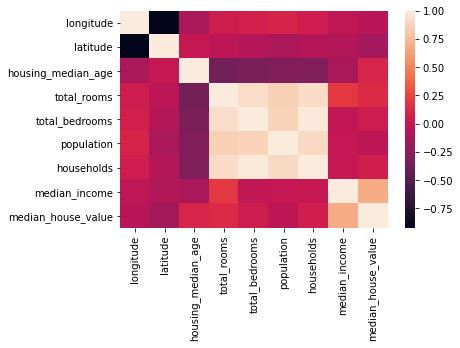

In [11]:
# `heatmap` plots a rectangular data in a color-encoded matrix and `corr` finds the pairwise correlation of all
# columns in the DataFrame
sns.heatmap(df_USAhousing.corr())

Create a distplot showing `median_house_value`.

/home/antounes/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


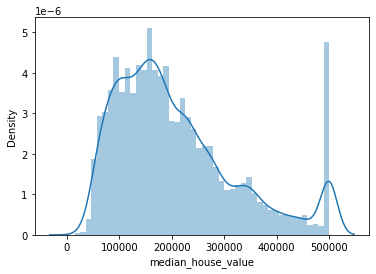

In [13]:
# Plot a univariate distribution of observations using seaborn `distplot()` function
sns.distplot(df_USAhousing["median_house_value"]);

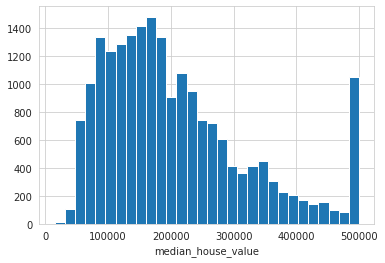

In [14]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")
# Plot histogram using `hist()` function
df_USAhousing["median_house_value"].hist(bins=30)
plt.xlabel("median_house_value");

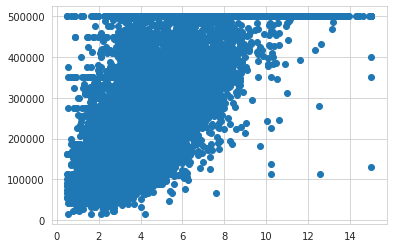

In [15]:
x = df_USAhousing["median_income"]
y = df_USAhousing["median_house_value"]

# Scatter plot of y vs x using `.scatter()` and `.show()` display all open figures
plt.scatter(x, y);
plt.show()

Create a jointplot showing `median_income` versus `median_house_value`

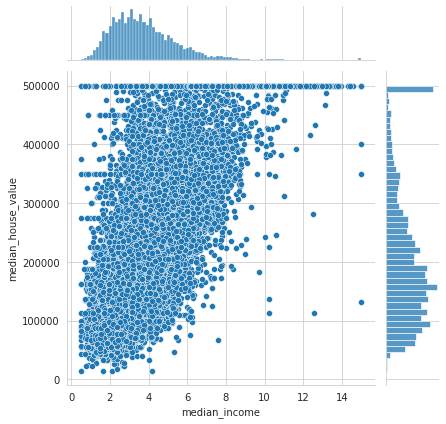

In [17]:
# `.jointplot()` draws a plot of two variables with bivariate and univariate graphs
sns.jointplot(x="median_income", y="median_house_value", data=df_USAhousing);

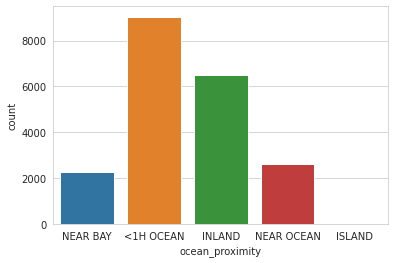

In [18]:
# `countplot()` shows the counts of observations in each categorical bin using bars
sns.countplot(x="ocean_proximity", data=df_USAhousing);

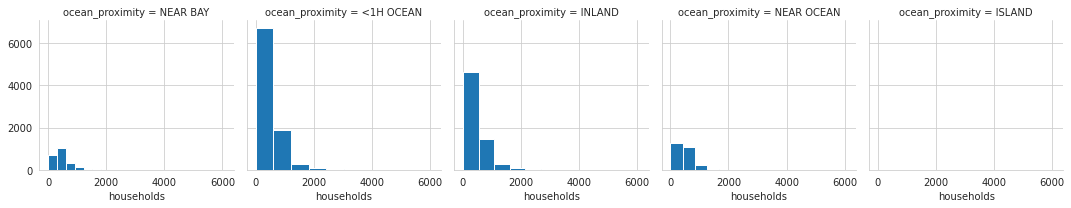

In [20]:
# Takes numeric only?
# plt.figure(figsize=(20,20))
# Draw a multi-plot on every facet using `FacetGrid()`
g = sns.FacetGrid(df_USAhousing, col="ocean_proximity")
# Pass a function and the name of one or more columns in the DataFame
g.map(plt.hist, "households");

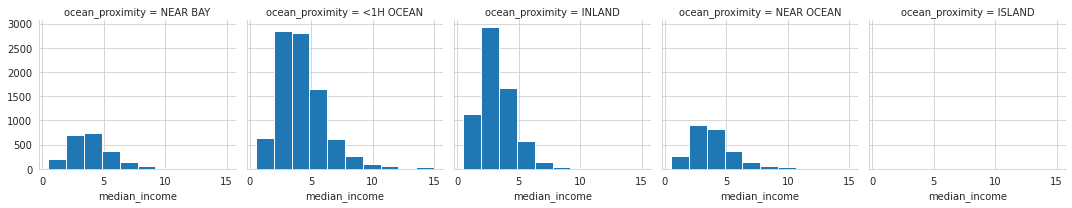

In [21]:
# Takes numeric only?
# plt.figure(figsize=(20,20))
# Draw a multi-plot on every facet using `FacetGrid()`
g = sns.FacetGrid(df_USAhousing, col="ocean_proximity")
# Pass a function and the name of one or more columns in the DataFame
g.map(plt.hist, "median_income");

You can see below that this is the state of California!

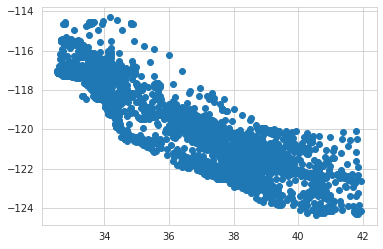

In [22]:
x = df_USAhousing["latitude"]
y = df_USAhousing["longitude"]

# Scatter plot of y vs x and display all open figures
plt.scatter(x, y);
plt.show()

## Explore and create ML data sets

In this notebook, we will explore data corresponding to taxi rides in New York City to build an ML model in support of a fare-estimation tool. The idea is to suggest a likely fare to taxi riders, so they are not surprised, and so they can protest if the charge is much higher than expected.

**Learning objectives**

- Access and explore a public BigQuery data set on NYC Taxi Cab rides
- Visualise your data set using the Seaborn library

First, **restart** the kernel. Now, let's start with the Python imports that we need.

In [3]:
# Import the Python libraries
from google.cloud import bigquery
%load_ext google.cloud.bigquery
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Extract sample data from BigQuery

The data set that we will use is a BigQuery public data set. Let's write a SQL query to pick up interesting fields from the data set. It's a good idea to get the timestamp in a predictable format.

In [ ]:
%%bigquery
# SQL query to get fields from data set 
SELECT
  FORMAT_TIMESTAMP(
      "%Y-%m-%d %H:%M:%S %Z", pickup_datetime
  ) AS pickup_datetime,
    pickup_latitude, 
    pickup_longitude, 
    dropoff_latitude, 
    dropoff_longitude,
    passenger_count,
    trip_distance,
    tolls_amount,
    fare_amount,
    total_amount
FROM
  `nyc-tlc.yellow.trips`
LIMIT
  10

Let's increase the number of records so that we can do some neat graphs. There is no guarantee about the order in which the records are returned, and so no guarantee about which records get returned if we simply increase the `LIMIT`.

To properly sample the data set, let's use the `HASH` of the `pickup_datetime` and return $1$ in $100,000$ records $-$ because there are $1$ billion records in the data, we should get back approximately $10,000$ records.

We will also store the BigQuery result in a Pandas DataFrame named `trips`.

In [ ]:
%%bigquery trips
# SQL query to save the results in the `trips` DataFrame
SELECT
  FORMAT_TIMESTAMP(
      "%Y-%m-%d %H:%M:%S %Z", pickup_datetime
  ) AS pickup_datetime,
    pickup_latitude,
    pickup_longitude,
    dropoff_latitude,
    dropoff_longitude,
    passenger_count,
    trip_distance,
    tolls_amount,
    fare_amount,
    total_amount
FROM
  `nyc-tlc.yellow.trips`
WHERE
  ABS(MOD(FARM_FINGERPRINT(CAST(pickup_datetime AS STRING)), 100000)) = 1

In [ ]:
print(len(trips))

In [ ]:
# We can slice Pandas DataFrames as if they were arrays
trips[:10]

### Exploring data

Let's explore this data set and clean it up as necessary. We'll use the Python seaborn package to visualise graphs and Pandas to do the slicing and filtering.

In [ ]:
# Use seaborn `.regplot()` function to plot the data along with a linear regression model fit
ax = sns.regplot(
    x="trip_distance", y="fare_amount",
    fit_reg=False, ci=None, truncate=True, data=trips)
ax.figure.set_size_inches(10, 8)

It appears that we have a lot of invalid data that is being coded as zero distance and some fare amounts are definitely illegitimate. Let's remove them from our analysis. We can do this by modifying the BigQuery query to keep only trips longer than zero miles and fare amounts that are at least the minimum cab fare ($2.50).

In [ ]:
%%biquery trips
SELECT
  FORMAT_TIMESTAMP(
      "%Y-%m-%d %H:%M:%S %Z", pickup_datetime
  ) AS pickup_datetime,
    pickup_latitude,
    pickup_longitude,
    dropoff_latitude,
    dropoff_longitude,
    passenger_count,
    trip_distance,
    tolls_amount,
    fare_amount,
    total_amount
FROM
  `nyc-tlc.yellow.trips`
WHERE
  ABS(MOD(FARM_FINGERPRINT(CAST(pickup_datetime AS STRING)), 100000)) = 1
AND
  trip_distance > 0
AND
  fare_amount >= 2.5

In [ ]:
print(len(trips))

In [ ]:
# Use seaborn `.regplot()` function to plot the data along with a linear regression fit
ax = sns.regplot(
    x="trip_distance", y="fare_amount",
    fit_reg=False, ci=None, truncate=True, data=trips)
ax.figure.set_size_inches(10, 8)

What's up with the streaks around $45~\$$ and $50~\$$? Those are fixed-amount rides from JFK and La Guardia airports into anywhere in Manhattan, i.e. to be expected. Let's list the data to make sure the values look reasonable.

Let's also examine whether the toll amount is captured in the total amount.

In [ ]:
tollrides = trips[trips["tolls_amount"]>0]
tollrides[notollrides["pickup_datetime"]=="2012-02-27 09:19:10 UTC"]

Looking at a few samples above, it should be clear that the total amount reflects the fare amount, toll and tip somewhat arbitrarily $-$ this is because when customers pay cash, the tip is not known. So, we'll use the sum of `fare_amount` $+$ `toll_amount` as what needs to be predicted. Tips are discretionary and do not have to be included in our fare estimation tool.

Let's also look at the distributions of the values within the columns.

In [ ]:
# Print the distribution of values within the columns using `.describe()`
trips.describe()